<a href="https://colab.research.google.com/github/labibazad191/IELTS_SEEKERS/blob/main/IELTSSEEKERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Step 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve


from sklearn.feature_extraction.text import TfidfVectorizer

import joblib

In [14]:
# Step 2: Load datasets
ielts_df = pd.read_csv('/content/ielts_writing_dataset.csv')
coherence_df = pd.read_csv('/content/Coherence_and_Cohesion.csv')
grammatical_range_df = pd.read_csv('/content/Grammatical_Range.csv')
lexical_resource_df = pd.read_csv('/content/Lexical_Resource.csv')






In [15]:
# Step 3: Data Preprocessing and Feature Engineering
# For classification tasks, create a 'question' + 'answer' feature and encode the target variables

def preprocess_data(df, target_column):
    X = df['question'] + ' ' + df['answer']
    y = df[target_column]

    # If y is a classification target, apply LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    return X, y_encoded

# Example: For classification in "Coherence_and_Cohesion.csv" using 'Include_an_introduction_and_conclusion' column
X, y = preprocess_data(coherence_df, 'Include_an_introduction_and_conclusion')

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best parameters found: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf', 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.30      0.43        33
           1       0.59      0.89      0.71        37

    accuracy                           0.61        70
   macro avg       0.65      0.60      0.57        70
weighted avg       0.65      0.61      0.58        70



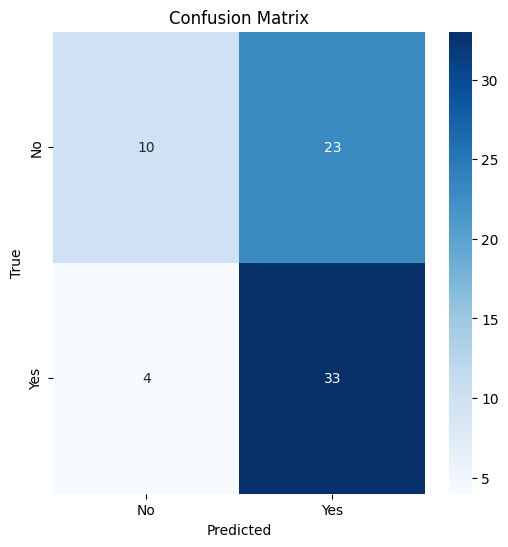

Accuracy: 0.6142857142857143


['svm_model_coherence_and_cohesion.pkl']

In [16]:
# Step 4: Set up pipeline and grid search for classification model
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('svm', SVC())
])

param_grid = {
    'tfidf__max_features': [5000, 10000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['rbf'],
    'svm__gamma': [0.1, 1, 'auto']
}

# Step 5: Perform GridSearchCV
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Print Best Parameters and Predictions
print("Best parameters found:", grid_search.best_params_)

# Predictions and evaluation
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'svm_model_coherence_and_cohesion.pkl')

In [17]:
# Make predictions on the test set
predictions = grid_search.predict(X_test)


In [18]:
# 1. Predict
predictions = grid_search.predict(X_test)

In [19]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('svm', SVC(probability=True))  # enables ROC later
])

# Train and predict
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)


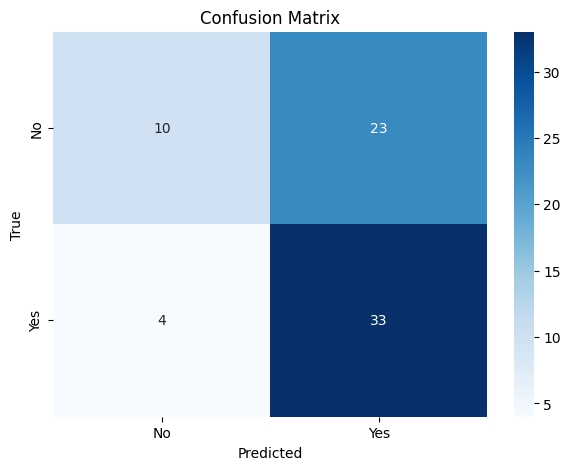

In [20]:
# Make sure model is already trained with grid_search.fit()

# 1. Predict
predictions = grid_search.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Step 7: Repeat for other datasets (Grammatical Range, Lexical Resource, etc.)

# For "Grammatical Range" dataset
X, y = preprocess_data(grammatical_range_df, 'Use_a_variety_of_complex_and_simple_sentences')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
print("Classification Report for Grammatical Range:")
print(classification_report(y_test, y_pred))

# Visualizing results for Grammatical Range
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Grammatical Range:", accuracy)

# Save the Grammatical Range model
joblib.dump(grid_search.best_estimator_, 'svm_model_grammatical_range.pkl')


In [ ]:


# Step 8: For Regression Task (e.g., Lexical Resource Score prediction)
X, y = preprocess_data(lexical_resource_df, 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SVR for regression
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('svm', SVR())
])

param_grid = {
    'tfidf__max_features': [5000, 10000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 'auto'],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predictions and evaluation
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Lexical Resource:", mse)

# Save the Lexical Resource Regression model
joblib.dump(grid_search.best_estimator_, 'svm_model_lexical_resource.pkl')
